In [15]:
import pandas as pd
df = pd.read_csv("NEW_Keywords_loan.csv")
df

,index,selftext,num_comments,score,title,type
0,23,Are payday type loans all I can do?,0,1,"Loans and credit cards, what to expect?",Adult
1,57,Cars are often upside down in their loans. Hom...,4,2,Buying Insurance (car and home/renters),Adult
2,112,"I'm 27F and never had a credit card, but now I...",4,9,Credit???,Adult
3,122,I figured out that to have a 3 month cushion I...,0,1,Savings,Adult
4,123,"He has since set boundaries on what, how much,...",0,1,Can you spot me? (LOANS!),Adult
...,...,...,...,...,...,...
5224,4169,"Do you wish to fucking go back to high school,...",24,1,Do you wish to go back to high shcool?,Adult
5225,4377,"I do have student loans, but they’re not nearl...",12,23,"I’m scared, not able to afford psychiatric med...",Adult
5226,4568,I am wondering what to do for the 19 year old....,32,1,Mom would appreciate your thoughts,Adult
5227,4746,We’ve been living off of my student loans.,0,1,"Hi, I’m a 19 year old girl who’s found herself...",Adult


In [16]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    #x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    #x = re.sub("[0-9]+", '', x) #remove numbers
    x = x.encode('ascii', 'ignore').decode()
    return x

In [17]:
from nltk.stem import WordNetLemmatizer
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [18]:
df['selftext']=df['selftext'].apply(lambda x: remove_other(x))
df['selftext']= df['selftext'].str.split().apply(lambda x: lemmatize(x))
df['selftext']

0                      Are payday type loan all I can do?
1       Cars are often upside down in their loans. Hom...
2       I'm 27F and never had a credit card, but now I...
3       I figured out that to have a 3 month cushion I...
4       He ha since set boundary on what, how much, an...
                              ...                        
5224    Do you wish to fucking go back to high school,...
5225    I do have student loans, but theyre not nearly...
5226    I am wondering what to do for the 19 year old....
5227            Weve been living off of my student loans.
5228    So I'm gonna take out another loan which hey ,...
Name: selftext, Length: 5229, dtype: object

In [19]:
X=pd.DataFrame({'text':df['selftext']})
X = X.dropna().reset_index()
X

,index,text
0,0,Are payday type loan all I can do?
1,1,Cars are often upside down in their loans. Hom...
2,2,"I'm 27F and never had a credit card, but now I..."
3,3,I figured out that to have a 3 month cushion I...
4,4,"He ha since set boundary on what, how much, an..."
...,...,...
5224,5224,"Do you wish to fucking go back to high school,..."
5225,5225,"I do have student loans, but theyre not nearly..."
5226,5226,I am wondering what to do for the 19 year old....
5227,5227,Weve been living off of my student loans.


In [20]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer=‘char_wb’
vec=TfidfVectorizer(min_df=0.01,stop_words='english',ngram_range=(1,2))
counts=vec.fit_transform(X['text'])
counts=counts.toarray()
count_df1=pd.DataFrame(counts,columns=vec.get_feature_names())
count_df1=count_df1.drop(['amp','don'],axis=1)
count_df1

,000,000 loan,000 student,10,10 000,10 year,100,1000,100k,10k,...,worried,worth,x200b,year,year ago,year loan,year old,years,yr,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.108889,0.0,0.0,0.223407,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
5225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
5226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.359984,0.0,0.0,0.369291,0.0,0.0,0.0
5227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [21]:
from sklearn.decomposition import NMF

model1=NMF(n_components=6,init="random",random_state=0)
model1.fit(count_df1)
#model1.components_

NMF(init='random', n_components=6, random_state=0)

In [22]:
import numpy as np
def top_words(X, model, component, num_words):
    """
    Extract the top words from the specified component 
    for a topic model trained on data. 
    X: a term-document matrix, assumed to be a pd.DataFrame
    model: a sklearn model with a components_ attribute, e.g. NMF
    component: the desired component, specified as an integer. 
        Must be less than than the total number of components in model
    num_words: the number of words to return.
    """
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(X.columns)[orders]
    return important_words[component][-num_words:]

In [23]:
topic1=pd.DataFrame({'Topic 0':top_words(count_df1, model1, 0, 10),
                   'Topic 1':top_words(count_df1, model1, 1, 10),
                   'Topic 2':top_words(count_df1, model1, 2, 10),
                   'Topic 3':top_words(count_df1, model1, 3, 10),
                    'Topic 4':top_words(count_df1, model1, 4, 10),
                    'Topic 5':top_words(count_df1, model1, 5, 10)})
topic1

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,month,house,money,union,left,5k
1,paid,just,federal,credit union,new car,taking
2,pay,mortgage,pay student,loan credit,paid,debt
3,000,home,paying,card debt,pay car,looking
4,paying,payment,debt student,credit score,payment,pay
5,loan,rate,debt,debt,month,option
6,loan debt,wa,pay,score,loan car,apr
7,debt,pay,student,credit card,loan,loan
8,student,year,student loans,card,car loan,personal loan
9,student loan,loan,loans,credit,car,personal


Topic 0: payment for house/car \
Topic 1: retirement saving \
Topic 2: job \
Topic 3: account/debt/credit card/score \
Topic 4: time and life 

In [181]:
W=model1.fit_transform(count_df1)
L=[]
for i in W:
    L.append(i.argmax())
X['topic']=L
t0=X[X.topic==0]
t1=X[X.topic==1]
t2=X[X.topic==2]
t3=X[X.topic==3]
t4=X[X.topic==4]

## Compare Emotion across topics

In [182]:
def sent_df(df):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    import my_module
    import importlib
    importlib.reload(my_module)

    #create a list of dictionaries
    sia = SIA()
    results = []
    words=[]

    for line in df['text']:
        D,pol_score=my_module.polarity_scores(sia,text=line) #use customized module
        pol_score['text'] = line
        results.append(pol_score)
        words.append(D)
    #Extract sentiment words
    D_p=[] # positive word and its sentiment score
    D_n=[] # negative word and its sentiment score
    D1=[] # only positive word
    D2=[] # only negative word
    for i in range(len(words)):
        newDict = {key: value for (key, value) in words[i].items() if value != 0.0 }
        newDict1 = {key: value for (key, value) in words[i].items() if value > 0.0 }
        newDict2 = {key: value for (key, value) in words[i].items() if value < 0.0 }
        D_p.append(newDict1)
        D_n.append(newDict2)
        D1.append(list(newDict1.keys()))
        D2.append(list(newDict2.keys()))
    #create a df to write in the results of sentiment analysis
    sent = pd.DataFrame(results)
    sent['p_word_dict']=D_p
    sent['n_word_dict']=D_n
    p=[]
    n=[]
    for i in D1:
        p.append(' '.join(i))
    for i in D2:
        n.append(' '.join(i))
    sent['total']=(sent.pos-sent.neg)/sent.neu    
    sent['p_word']=p
    sent['n_word']=n
    sent['label']=0
    sent['label'].loc[sent['total']> 0]=1
    sent['label'].loc[sent['total']< 0]=-1
    return sent

In [190]:
a=sent_df(t0)
a['topic']=0

b=sent_df(t1)
b['topic']=1

c=sent_df(t2)
c['topic']=2

d=sent_df(t3)
d['topic']=3

e=sent_df(t4)
e['topic']=4

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [220]:
final=pd.concat([a,b,c,d,e],axis=0)
final.total.describe()

count    3920.000000
mean        0.055452
std         0.101380
min        -0.529052
25%        -0.001208
50%         0.053171
75%         0.109797
max         0.776199
Name: total, dtype: float64

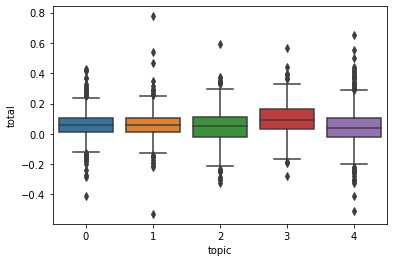

In [193]:
import seaborn as sns
ax = sns.boxplot(x="topic", y="total", data=final)

## Most common positive/negative words

In [197]:
def sort_pn(df):
    positive=df.p_word[df['label']==1] #positive words in positive post
    negative=df.n_word[df['label']==-1] #negative words in negative post
    return positive,negative

In [198]:
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df

In [201]:
positive,negative=sort_pn(final)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,1254
1,want,937
2,ha,910
3,help,768
4,good,643
0,no,420
1,pay,283
2,want,148
3,bad,130
4,debt,127


In [228]:
positive,negative=sort_pn(a)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,287
1,want,253
2,ha,246
3,help,205
4,credit,181
0,pay,106
1,no,83
2,debt,53
3,sure,25
4,want,24


In [203]:
positive,negative=sort_pn(b)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,236
1,want,190
2,ha,180
3,help,145
4,good,103
0,no,80
1,pay,45
2,debt,21
3,sure,21
4,emergency,17


In [204]:
positive,negative=sort_pn(c)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,186
1,want,145
2,help,118
3,ha,101
4,good,75
0,no,75
1,ill,50
2,pay,44
3,want,35
4,bad,29


In [205]:
positive,negative=sort_pn(d)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,credit,255
1,like,88
2,good,86
3,ha,84
4,help,81
0,pay,21
1,no,20
2,debt,16
3,credit,10
4,bad,7


In [206]:
positive,negative=sort_pn(e)
p_n=pd.concat([count_words(positive)[:5],count_words(negative)[:5]])
p_n

,words,count
0,like,457
1,ha,299
2,want,278
3,help,219
4,good,208
0,no,162
1,want,71
2,bad,68
3,pay,67
4,hard,55


## Word Frequency splitted by sentiment

In [222]:
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))

stop_words.update({'would','k','im','could','also',
                   'amp','much','one','like','get',
                   'since','etc','got','always',
                   'know','thing','really','dont',
                   'find','even','go','time','need','want'
                  })
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

final['text']=final['text'].apply(lambda x: remove_stopwords(x))

In [223]:
from nltk.util import ngrams
def count_2gram(text):
    all_words = list(itertools.chain(*text.str.split()))
    es2grams = ngrams(all_words, 2)
    counts = collections.Counter(es2grams)
    count_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])
    dictionary2 = [' '.join(tup) for tup in count_df.words]
    count_df.words=dictionary2

    return count_df

In [224]:
def pn_freq(df):
    count_p=count_2gram(df['text'][df['label']>0.109797]) #>0.109797 #==1
    count_n=count_2gram(df['text'][df['label']<-0.001208]) #<-0.001208 #==-1
    return count_p,count_n

p,n=pn_freq(final)
p.head(10),n.head(10)

(            words  count
 0     credit card    450
 1    student loan    275
 2        year old    254
 3    credit score    219
 4        roth ira    185
 5        i'm sure    141
 6  saving account    135
 7     live parent    127
 8   interest rate    115
 9        year ago    115,
               words  count
 0          year old     83
 1       credit card     68
 2      student loan     63
 3  health insurance     46
 4         i'm going     45
 5          i'm sure     41
 6          year ago     37
 7     mental health     36
 8     living parent     36
 9         last year     34)

In [225]:
p,n=pn_freq(final[final.topic==0])
p.head(10),n.head(10)

(             words  count
 0     student loan    187
 1      credit card     84
 2    interest rate     76
 3         year old     71
 4        buy house     66
 5     credit score     55
 6      live parent     54
 7  monthly payment     53
 8      i'm looking     44
 9        per month     41,
               words  count
 0      student loan     43
 1  health insurance     22
 2          year old     17
 3       credit card     17
 4          pay rent     15
 5     car insurance     15
 6          i'm sure     13
 7       car payment     11
 8         buy house     11
 9        parent pay      9)

In [226]:
p,n=pn_freq(final[final.topic==1])
p.head(10),n.head(10)

(               words  count
 0           roth ira    158
 1     saving account     96
 2       bank account     65
 3         index fund     51
 4           year old     41
 5  brokerage account     38
 6       stock market     37
 7   checking account     35
 8           i'm sure     35
 9       student loan     35,
                words  count
 0           roth ira     33
 1       bank account     24
 2     saving account     21
 3           year old     17
 4            pay tax     14
 5       student loan     11
 6     emergency fund     11
 7          put money     10
 8         account wa     10
 9  brokerage account      9)

In [229]:
p,n=pn_freq(final[final.topic==2])
p.head(10),n.head(10)

(           words  count
 0       year old     49
 1      ive never     26
 2  living parent     24
 3   parent house     22
 4    high school     21
 5      take care     20
 6        new job     18
 7     right now.     18
 8     right now,     18
 9    live parent     14,
               words  count
 0     mental health     16
 1          year old     16
 2           new job     12
 3     living parent     11
 4       high school     11
 5  health insurance     11
 6        moved back      9
 7         ive never      9
 8         last year      9
 9       live parent      8)

In [230]:
p,n=pn_freq(final[final.topic==3])
p.head(10),n.head(10)

(             words  count
 0      credit card    303
 1     credit score    143
 2     student loan     32
 3   credit history     28
 4    credit report     27
 5     build credit     24
 6        card debt     24
 7     credit card,     22
 8  authorized user     22
 9     credit card.     21,
                words  count
 0        credit card     40
 1       credit score     13
 2  collection agency      9
 3         debit card      7
 4       never credit      7
 5      credit report      7
 6       credit card,      6
 7            6 month      4
 8          paid bill      4
 9           year ago      4)

In [231]:
p,n=pn_freq(final[final.topic==4])
p.head(10),n.head(10)

(         words  count
 0     year old     76
 1     i'm sure     54
 2  high school     52
 3    i'm going     52
 4    take care     46
 5  best friend     38
 6   i'm trying     37
 7    make sure     36
 8     year ago     31
 9     feel i'm     31,
            words  count
 0      i'm going     33
 1       year old     30
 2       feel i'm     24
 3       wa going     23
 4     thought wa     20
 5  mental health     19
 6       i'm sure     19
 7     i've never     19
 8    i'm worried     18
 9    high school     16)